In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import re


from functions import *

# EDA 1st Dataset (121K rows) global_electriciy_production

In [332]:
#load dataset 1        
df1 = pd.read_csv('./data/global_electricity_production_data.csv')     
df1.head()                       


,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh


In [333]:
initial_data_checking(df1)


Shape of the DataFrame:

(121074, 6)

Duplicate Rows Number:

0

Summary Statistics:

              value
count  121060.00000
mean     6925.08149
std     34224.45546
min         0.00000
25%        41.19900
50%       470.41900
75%      2629.71275
max    865976.48280


In [334]:
unique_and_missing_values_dtype(df1)

,non-Null_count,dtype,unique_values,%_unique,missing_values,%_missing
country_name,121074,object,48,0.04%,0,0.0%
date,121074,object,168,0.14%,0,0.0%
parameter,121074,object,7,0.01%,0,0.0%
product,121074,object,16,0.01%,0,0.0%
value,121060,float64,101983,84.23%,14,0.01%
unit,121074,object,1,0.0%,0,0.0%


In [335]:
# separate categorical and numerical columns:
def separate_columns(df1):
    categorical_cols = df1[['country_name', 'date', 'parameter', 'product', 'unit']]
    numerical_cols = df1[['value']]
    
    print("\nCategorical Columns:\n")
    print(categorical_cols.head())  # Using head() to show the first few rows
    print("\nNumerical Columns:\n")
    print(numerical_cols.head())  # Using head() to show the first few rows
    
separate_columns(df1)


Categorical Columns:

  country_name       date                   parameter  \
0    Australia  12/1/2023  Net Electricity Production   
1    Australia  12/1/2023  Net Electricity Production   
2    Australia  12/1/2023  Net Electricity Production   
3    Australia  12/1/2023  Net Electricity Production   
4    Australia  12/1/2023  Net Electricity Production   

                             product unit  
0                        Electricity  GWh  
1            Total Combustible Fuels  GWh  
2  Coal, Peat and Manufactured Gases  GWh  
3         Oil and Petroleum Products  GWh  
4                        Natural Gas  GWh  

Numerical Columns:

        value
0  22646.1901
1  13397.9356
2   9768.5223
3    289.5415
4   3091.9272


In [336]:
# analyze_categorical cols:
analyze_categorical(df1)

,country_name,date,parameter,product,unit
count,121074,121074,121074,121074,121074
unique,48,168,7,16,1
top,France,3/1/2021,Net Electricity Production,Electricity,GWh
freq,3348,893,93318,34930,121074


In [337]:
  # analyze_numerical cols:
analyze_numerical(df1)


Numerical Columns Analysis:


,value
count,121060.00000
mean,6925.08149
std,34224.45546
min,0.00000
25%,41.19900
50%,470.41900
75%,2629.71275
max,865976.48280


In [338]:
# Count missing values in the 'value' column of df1
missing_values_count = df1['value'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'value' column:", missing_values_count)

Number of missing values in 'value' column: 14


In [339]:
#display missing data
missing_value_rows = df1[df1['value'].isna()]

# Print the rows with missing values in the 'value' column
missing_value_rows

,country_name,date,parameter,product,value,unit
67,Chile,12/1/2023,Remarks,Data is estimated for this month,NaN,GWh
94,Costa Rica,12/1/2023,Remarks,Data is estimated for this month,NaN,GWh
285,Japan,12/1/2023,Remarks,Data is estimated for this month,NaN,GWh
804,Costa Rica,11/1/2023,Remarks,Data is estimated for this month,NaN,GWh
1517,Costa Rica,10/1/2023,Remarks,Data is estimated for this month,NaN,GWh
2230,Costa Rica,9/1/2023,Remarks,Data is estimated for this month,NaN,GWh
2944,Costa Rica,8/1/2023,Remarks,Data is estimated for this month,NaN,GWh
3659,Costa Rica,7/1/2023,Remarks,Data is estimated for this month,NaN,GWh
4375,Costa Rica,6/1/2023,Remarks,Data is estimated for this month,NaN,GWh
5090,Costa Rica,5/1/2023,Remarks,Data is estimated for this month,NaN,GWh


In [340]:
countries  = df1['country_name'].unique()
countries

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States',
       'Argentina', 'Brazil', 'Bulgaria', 'China', 'Croatia', 'Cyprus',
       'India', 'Malta', 'North Macedonia', 'Peru', 'Serbia'],
      dtype=object)

In [341]:
# Check if 'date' column is in datetime format
if pd.api.types.is_datetime64_any_dtype(df1['date']):
    print("The 'date' column is already in datetime format.")
else:
    print("The 'date' column is not in datetime format.")

The 'date' column is not in datetime format.


In [342]:
parameter_counts = df1['parameter'].value_counts()
parameter_counts

parameter
Net Electricity Production        93318
Final Consumption (Calculated)     6036
Distribution Losses                6033
Total Exports                      5416
Total Imports                      5411
Used for pumped storage            4846
Remarks                              14
Name: count, dtype: int64

In [343]:
product_count = df1['product'].value_counts()
product_count

product
Electricity                                          34930
Total Combustible Fuels                               7188
Total Renewables (Hydro, Geo, Solar, Wind, Other)     7188
Hydro                                                 7070
Oil and Petroleum Products                            7066
Combustible Renewables                                7049
Wind                                                  7040
Natural Gas                                           6923
Solar                                                 6898
Coal, Peat and Manufactured Gases                     6525
Other Combustible Non-Renewables                      6147
Not Specified                                         5098
Nuclear                                               4814
Geothermal                                            4267
Other Renewables                                      2857
Data is estimated for this month                        14
Name: count, dtype: int64

In [344]:
unit_count = df1['unit'].value_counts()
unit_count

unit
GWh    121074
Name: count, dtype: int64

# Data cleaning main dataset

In [345]:
#format titles names 
format_column_titles(df1)

Index(['country_name', 'date', 'parameter', 'product', 'value', 'unit'], dtype='object')

In [346]:
#filter EU countries 
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden']

df_eu = df1.loc[df1['country_name'].isin(eu_countries)]

In [347]:
#drop rows with missing data 
df_cleaned = df_eu.dropna(axis=1)

In [348]:
#check cleaned date
unique_and_missing_values_dtype(df_cleaned)

,non-Null_count,dtype,unique_values,%_unique,missing_values,%_missing
country_name,71097,object,26,0.04%,0,0.0%
date,71097,object,168,0.24%,0,0.0%
parameter,71097,object,6,0.01%,0,0.0%
product,71097,object,15,0.02%,0,0.0%
value,71097,float64,61218,86.1%,0,0.0%
unit,71097,object,1,0.0%,0,0.0%


In [349]:
#make a copy (before year formatting)
df_main = df_cleaned.copy()

In [350]:
#format year
df_main["year"] = df_main["date"].apply(lambda x: int(x.split("/")[2]))
df_main.head()

,country_name,date,parameter,product,value,unit,year
13,Austria,12/1/2023,Net Electricity Production,Electricity,6783.2730,GWh,2023
14,Austria,12/1/2023,Net Electricity Production,Total Combustible Fuels,1746.9034,GWh,2023
15,Austria,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",167.3548,GWh,2023
16,Austria,12/1/2023,Net Electricity Production,Oil and Petroleum Products,73.8682,GWh,2023
17,Austria,12/1/2023,Net Electricity Production,Natural Gas,1035.0865,GWh,2023


In [351]:
df_main = df_main.reset_index(drop=True)
df_main

,country_name,date,parameter,product,value,unit,year
0,Austria,12/1/2023,Net Electricity Production,Electricity,6783.2730,GWh,2023
1,Austria,12/1/2023,Net Electricity Production,Total Combustible Fuels,1746.9034,GWh,2023
2,Austria,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",167.3548,GWh,2023
3,Austria,12/1/2023,Net Electricity Production,Oil and Petroleum Products,73.8682,GWh,2023
4,Austria,12/1/2023,Net Electricity Production,Natural Gas,1035.0865,GWh,2023
...,...,...,...,...,...,...,...
71092,Sweden,1/1/2010,Total Imports,Electricity,1806.0000,GWh,2010
71093,Sweden,1/1/2010,Total Exports,Electricity,266.6560,GWh,2010
71094,Sweden,1/1/2010,Used for pumped storage,Electricity,16.1090,GWh,2010
71095,Sweden,1/1/2010,Distribution Losses,Electricity,1091.0110,GWh,2010


In [352]:
#df_main = df_main.drop(columns=['index'])


In [353]:
df_main.head()

,country_name,date,parameter,product,value,unit,year
0,Austria,12/1/2023,Net Electricity Production,Electricity,6783.2730,GWh,2023
1,Austria,12/1/2023,Net Electricity Production,Total Combustible Fuels,1746.9034,GWh,2023
2,Austria,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",167.3548,GWh,2023
3,Austria,12/1/2023,Net Electricity Production,Oil and Petroleum Products,73.8682,GWh,2023
4,Austria,12/1/2023,Net Electricity Production,Natural Gas,1035.0865,GWh,2023


In [354]:
df_main['value'] = df_main['value'].round()

In [355]:
df_main.head()

,country_name,date,parameter,product,value,unit,year
0,Austria,12/1/2023,Net Electricity Production,Electricity,6783.0,GWh,2023
1,Austria,12/1/2023,Net Electricity Production,Total Combustible Fuels,1747.0,GWh,2023
2,Austria,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",167.0,GWh,2023
3,Austria,12/1/2023,Net Electricity Production,Oil and Petroleum Products,74.0,GWh,2023
4,Austria,12/1/2023,Net Electricity Production,Natural Gas,1035.0,GWh,2023


In [356]:
df_main['value'] = df_main['value'].astype(int)
df_main.head()

,country_name,date,parameter,product,value,unit,year
0,Austria,12/1/2023,Net Electricity Production,Electricity,6783,GWh,2023
1,Austria,12/1/2023,Net Electricity Production,Total Combustible Fuels,1747,GWh,2023
2,Austria,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",167,GWh,2023
3,Austria,12/1/2023,Net Electricity Production,Oil and Petroleum Products,74,GWh,2023
4,Austria,12/1/2023,Net Electricity Production,Natural Gas,1035,GWh,2023


# This is where my code start

In [357]:
df_main["product"].value_counts()

product
Electricity                                          21957
Total Combustible Fuels                               4128
Total Renewables (Hydro, Geo, Solar, Wind, Other)     4128
Combustible Renewables                                4109
Natural Gas                                           4043
Wind                                                  4036
Solar                                                 4032
Oil and Petroleum Products                            4019
Hydro                                                 4010
Coal, Peat and Manufactured Gases                     3743
Other Combustible Non-Renewables                      3732
Not Specified                                         2946
Nuclear                                               2737
Geothermal                                            2085
Other Renewables                                      1392
Name: count, dtype: int64

In [358]:
df_main["country_name"].unique()

array(['Austria', 'Belgium', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
       'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands',
       'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Bulgaria', 'Croatia', 'Cyprus', 'Malta'], dtype=object)

## Hypothesis 3

### 3.1. Data Collection, Wranging, and Cleaning

We need three dataframes to prove Hypothesis 3 which consist of:
- dataframe of renewable energy production of the EU countries for the past 10 years.
- dataframe of R&D budget of the EU countries for the past 10 years.
- dataframe of EU population.

For the first dataframe, we need to filter our main dataframe to show only products with renewable energy. In this case, we focus only on "Total Renewables (Hydro, Geo, Solar, Wind, Other)" and "Other Renewable". Furthermore, we will only use the data from country who has R&D budget. After that, we take the data from 2013 to 2023 and group them by "country_name" and "value".

For the second dataframe, we notice that there are countries who don't have enough data on the R&D budget. Therefore, we decide to drop the country who has five or more missing values. For countries with missing value of less than five, we will fill the missing values with the value of previous year. 
We would then convert the wide format dataframe into a long format for the visualization.

For the last dataframe, we want to focus only on "geo" column, which has each country code, and "population" column. We will then add a new column of "country_name" to show the country's full name by using .map() method. 

After all three dataframes are clean, we will create two new dataframes to show the renewable energy production per capita and R&D budget per capita by dividing the renewable energy production and R&D budget with the population, respectively.

### 3.2. Visualization

We decide to use scatter plot to show the correlation between renewable energy production and R&D budget per capita. First, we need to merge two dataframes of renewable energy and R&D budget per capita. Subsequently, we find the correlation coefficient (r) for our trendline. We use pyplot express to visualize the correlation. 

The r value is 0.61 which indicates strong positive correlation. It proves our hypothesis that when a country invests more in R&D in renewable energy technoloties, the renewable energy production growth will also be faster. Innovation in technology can lead to more efficient and cost-effective renewable energy solutions.


In [359]:
# create a dataframe for renewables only

renewable_products = ["Total Renewables (Hydro, Geo, Solar, Wind, Other)", "Other Renewables"]

filtered_df = df_main[df_main["product"].isin(renewable_products)].reset_index(drop=True)

# change year into integer and filter the year into past 10 years

filtered_df["year"].astype(int)
filtered_df = filtered_df[(filtered_df["year"] > 2012) & (filtered_df["year"] < 2024)]
filtered_df["value"] = filtered_df["value"].round(0).astype(int)

filtered_df.value_counts()


country_name  date       parameter                   product                                            value  unit  year
Austria       1/1/2013   Net Electricity Production  Total Renewables (Hydro, Geo, Solar, Wind, Other)  4205   GWh   2013    1
Luxembourg    12/1/2013  Net Electricity Production  Total Renewables (Hydro, Geo, Solar, Wind, Other)  123    GWh   2013    1
              2/1/2014   Net Electricity Production  Total Renewables (Hydro, Geo, Solar, Wind, Other)  132    GWh   2014    1
              2/1/2013   Net Electricity Production  Total Renewables (Hydro, Geo, Solar, Wind, Other)  108    GWh   2013    1
              12/1/2023  Net Electricity Production  Total Renewables (Hydro, Geo, Solar, Wind, Other)  211    GWh   2023    1
                                                                                                                            ..
France        1/1/2020   Net Electricity Production  Other Renewables                                   40     GWh  

In [360]:
# group the dataframe based on country_name and year

grouped_df = filtered_df.groupby(["country_name", "year"])["value"].sum().reset_index()

# rename value to include its unit
grouped_df = grouped_df.rename(columns={"value":"value_(GWh)"})

grouped_df

,country_name,year,value_(GWh)
0,Austria,2013,51827
1,Austria,2014,51369
2,Austria,2015,48406
3,Austria,2016,51467
4,Austria,2017,52450
...,...,...,...
273,Sweden,2019,98073
274,Sweden,2020,111297
275,Sweden,2021,114682
276,Sweden,2022,120078


In [361]:
# filter the countries in the renewable energy production (grouped_df) with countries who have RnD budget

countries_with_RnD_budget = ['Austria', 'Belgium', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Hungary', 'Ireland', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Slovak Republic', 'Spain', 'Sweden']

RE_production_df = grouped_df[grouped_df["country_name"].isin(countries_with_RnD_budget)].reset_index(drop=True).round(0)

RE_production_df


,country_name,year,value_(GWh)
0,Austria,2013,51827
1,Austria,2014,51369
2,Austria,2015,48406
3,Austria,2016,51467
4,Austria,2017,52450
...,...,...,...
182,Sweden,2019,98073
183,Sweden,2020,111297
184,Sweden,2021,114682
185,Sweden,2022,120078


In [362]:
# import the R&D budget document. The value is in million EUR.

file_path_RnD_budget = r'C:\Users\erlin\OneDrive\Documents\09 Ironhack\07 Bootcamp\03 Week 3 - First project\04 Others\RE topics\RnD_budget.xlsx'

RnD_budget = pd.read_excel(file_path_RnD_budget)

df_RnD_budget = RnD_budget.copy()
df_RnD_budget = df_RnD_budget.drop(columns=2012)
df_RnD_budget

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Austria,73.902,80.348,72.471,82.885,81.356,81.180,89.551,89.412,109.359,116.630,NaN
1,Belgium,64.807,64.460,65.908,53.456,51.910,66.544,78.975,143.928,33.309,122.916,89.398
2,Czech Republic,3.439,2.457,5.935,6.320,10.789,12.823,18.529,15.623,35.385,29.572,20.456
3,Denmark,40.110,50.959,33.143,22.580,21.746,13.389,27.598,37.107,23.055,16.514,22.959
4,Estonia,2.473,0.763,3.419,1.820,3.887,2.603,1.431,1.162,0.197,2.894,0.114
5,Finland,144.673,162.318,164.798,125.972,127.756,112.648,105.542,85.764,84.000,94.635,NaN
6,France,286.941,293.669,268.517,273.854,237.371,273.282,230.022,336.272,267.252,415.969,NaN
7,Germany,239.019,149.219,150.139,128.776,163.251,169.425,243.531,230.691,234.747,195.012,NaN
8,Hungary,0.052,3.563,4.834,5.456,58.555,8.943,5.441,8.657,26.086,2.364,0.032
9,Ireland,3.626,2.900,1.814,2.404,2.369,4.252,4.894,3.986,4.450,7.143,NaN


In [363]:
# drop row which has more than 5 NaNs in the columns

#count the NaN in every row  
na_counts_per_row = df_RnD_budget.isna().sum(axis=1)

df_RnD_budget = df_RnD_budget[na_counts_per_row <= 5].reset_index(drop=True)
df_RnD_budget


,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Austria,73.902,80.348,72.471,82.885,81.356,81.180,89.551,89.412,109.359,116.630,NaN
1,Belgium,64.807,64.460,65.908,53.456,51.910,66.544,78.975,143.928,33.309,122.916,89.398
2,Czech Republic,3.439,2.457,5.935,6.320,10.789,12.823,18.529,15.623,35.385,29.572,20.456
3,Denmark,40.110,50.959,33.143,22.580,21.746,13.389,27.598,37.107,23.055,16.514,22.959
4,Estonia,2.473,0.763,3.419,1.820,3.887,2.603,1.431,1.162,0.197,2.894,0.114
5,Finland,144.673,162.318,164.798,125.972,127.756,112.648,105.542,85.764,84.000,94.635,NaN
6,France,286.941,293.669,268.517,273.854,237.371,273.282,230.022,336.272,267.252,415.969,NaN
7,Germany,239.019,149.219,150.139,128.776,163.251,169.425,243.531,230.691,234.747,195.012,NaN
8,Hungary,0.052,3.563,4.834,5.456,58.555,8.943,5.441,8.657,26.086,2.364,0.032
9,Ireland,3.626,2.900,1.814,2.404,2.369,4.252,4.894,3.986,4.450,7.143,NaN


In [364]:
# fill the NaN value with the value of left row
df_RnD_budget = df_RnD_budget.apply(lambda row: row.ffill(axis=0), axis=1)
df_RnD_budget = df_RnD_budget.rename(columns = {"Country ": "country_name"})
df_RnD_budget

,country_name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Austria,73.902,80.348,72.471,82.885,81.356,81.180,89.551,89.412,109.359,116.630,116.630
1,Belgium,64.807,64.460,65.908,53.456,51.910,66.544,78.975,143.928,33.309,122.916,89.398
2,Czech Republic,3.439,2.457,5.935,6.320,10.789,12.823,18.529,15.623,35.385,29.572,20.456
3,Denmark,40.110,50.959,33.143,22.580,21.746,13.389,27.598,37.107,23.055,16.514,22.959
4,Estonia,2.473,0.763,3.419,1.820,3.887,2.603,1.431,1.162,0.197,2.894,0.114
5,Finland,144.673,162.318,164.798,125.972,127.756,112.648,105.542,85.764,84.000,94.635,94.635
6,France,286.941,293.669,268.517,273.854,237.371,273.282,230.022,336.272,267.252,415.969,415.969
7,Germany,239.019,149.219,150.139,128.776,163.251,169.425,243.531,230.691,234.747,195.012,195.012
8,Hungary,0.052,3.563,4.834,5.456,58.555,8.943,5.441,8.657,26.086,2.364,0.032
9,Ireland,3.626,2.900,1.814,2.404,2.369,4.252,4.894,3.986,4.450,7.143,7.143


In [365]:
# convert df_RnD_budget into long format

df_RnD_budget_long = pd.melt(df_RnD_budget, id_vars=["country_name"], var_name="year", value_name= 'budget')
df_RnD_budget_long["year"] = pd.to_numeric(df_RnD_budget_long["year"])

# rename budget to include its unit

df_RnD_budget_long = df_RnD_budget_long.rename(columns={"budget":"budget_(million_Euro)"})

df_RnD_budget_long 

,country_name,year,budget_(million_Euro)
0,Austria,2013,73.902
1,Belgium,2013,64.807
2,Czech Republic,2013,3.439
3,Denmark,2013,40.110
4,Estonia,2013,2.473
...,...,...,...
182,Poland,2023,19.410
183,Portugal,2023,32.196
184,Slovak Republic,2023,8.820
185,Spain,2023,368.924


In [369]:
# update both RE production and R&D budget dataframe by considering the population of each country

file_path_population = r'C:\Users\erlin\OneDrive\Documents\09 Ironhack\07 Bootcamp\03 Week 3 - First project\04 Others\RE topics\eu_country_population.csv'

df_population_original = pd.read_csv(file_path_population)
df_population = df_population_original.copy()

# drop unnecessary columns

df_population = df_population.drop(columns=["DATAFLOW","LAST UPDATE","freq","indic_de","TIME_PERIOD","OBS_FLAG"])

# rename column names 

df_population = df_population.rename(columns={"OBS_VALUE":"population"})

In [370]:
df_population 

,geo,population
0,AT,9104772
1,BE,11742796
2,BG,6447710
3,CY,920701
4,CZ,10827529
5,DE,84358845
6,DK,5932654
7,EE,1365884
8,EL,10413982
9,ES,48085361


In [371]:
# drop the outlier

df_population = df_population[df_population['geo'] != "EU27_2020"]


In [372]:
# rename country code with country full name using map

country_codes_dict = {
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'EL': 'Greece',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SE': 'Sweden',
    'SI': 'Slovenia',
    'SK': 'Slovak Republic'}

# gender_mapping = {'male': 0, 'female': 1}
# df['Gender_mapped'] = df['Sex'].map(gender_mapping)

df_population["country_name"] = df_population["geo"].map(country_codes_dict)
df_population

C:\Users\erlin\AppData\Local\Temp\ipykernel_13352\2642954344.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,geo,population,country_name
0,AT,9104772,Austria
1,BE,11742796,Belgium
2,BG,6447710,Bulgaria
3,CY,920701,Cyprus
4,CZ,10827529,Czech Republic
5,DE,84358845,Germany
6,DK,5932654,Denmark
7,EE,1365884,Estonia
8,EL,10413982,Greece
9,ES,48085361,Spain


In [373]:
# add population to RE adoption

RE_production_df = RE_production_df.merge(df_population, on='country_name', how='left')

In [374]:
RE_production_df

,country_name,year,value_(GWh),geo,population
0,Austria,2013,51827,AT,9104772
1,Austria,2014,51369,AT,9104772
2,Austria,2015,48406,AT,9104772
3,Austria,2016,51467,AT,9104772
4,Austria,2017,52450,AT,9104772
...,...,...,...,...,...
182,Sweden,2019,98073,SE,10521556
183,Sweden,2020,111297,SE,10521556
184,Sweden,2021,114682,SE,10521556
185,Sweden,2022,120078,SE,10521556


In [375]:
RE_production_df.dtypes

country_name    object
year             int64
value_(GWh)      int32
geo             object
population       int64
dtype: object

In [376]:
# convert value type into int64 --> otherwise the calculation results in negative value
RE_production_df['value_(GWh)'] = RE_production_df['value_(GWh)'].astype(np.int64)

# create a new column to show value per capita
RE_production_df["value_(kWh/capita)"] = (RE_production_df["value_(GWh)"] * 1000000 / RE_production_df["population"]).round(0).astype(np.int64) # result will be in kWh/capita


In [377]:
RE_production_df.dtypes

country_name          object
year                   int64
value_(GWh)            int64
geo                   object
population             int64
value_(kWh/capita)     int64
dtype: object

In [378]:
RE_production_df.head(3)

,country_name,year,value_(GWh),geo,population,value_(kWh/capita)
0,Austria,2013,51827,AT,9104772,5692
1,Austria,2014,51369,AT,9104772,5642
2,Austria,2015,48406,AT,9104772,5317


In [379]:
# add population to R&D budget

df_RnD_budget_long = df_RnD_budget_long.merge(df_population, on='country_name', how='left')

In [380]:
df_RnD_budget_long

,country_name,year,budget_(million_Euro),geo,population
0,Austria,2013,73.902,AT,9104772
1,Belgium,2013,64.807,BE,11742796
2,Czech Republic,2013,3.439,CZ,10827529
3,Denmark,2013,40.110,DK,5932654
4,Estonia,2013,2.473,EE,1365884
...,...,...,...,...,...
182,Poland,2023,19.410,PL,36753736
183,Portugal,2023,32.196,PT,10467366
184,Slovak Republic,2023,8.820,SK,5428792
185,Spain,2023,368.924,ES,48085361


In [381]:
df_RnD_budget_long.dtypes

country_name              object
year                       int64
budget_(million_Euro)    float64
geo                       object
population                 int64
dtype: object

In [382]:
# create a new column to show value per capita

df_RnD_budget_long["budget_(Euro/capita)"] = (df_RnD_budget_long["budget_(million_Euro)"] * 1000000 / df_RnD_budget_long["population"]).round(0).astype(np.int64) # result will be in Euro/capita


In [383]:
df_RnD_budget_long

,country_name,year,budget_(million_Euro),geo,population,budget_(Euro/capita)
0,Austria,2013,73.902,AT,9104772,8
1,Belgium,2013,64.807,BE,11742796,6
2,Czech Republic,2013,3.439,CZ,10827529,0
3,Denmark,2013,40.110,DK,5932654,7
4,Estonia,2013,2.473,EE,1365884,2
...,...,...,...,...,...,...
182,Poland,2023,19.410,PL,36753736,1
183,Portugal,2023,32.196,PT,10467366,3
184,Slovak Republic,2023,8.820,SK,5428792,2
185,Spain,2023,368.924,ES,48085361,8


## Visualization per capita

c:\Users\erlin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\erlin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



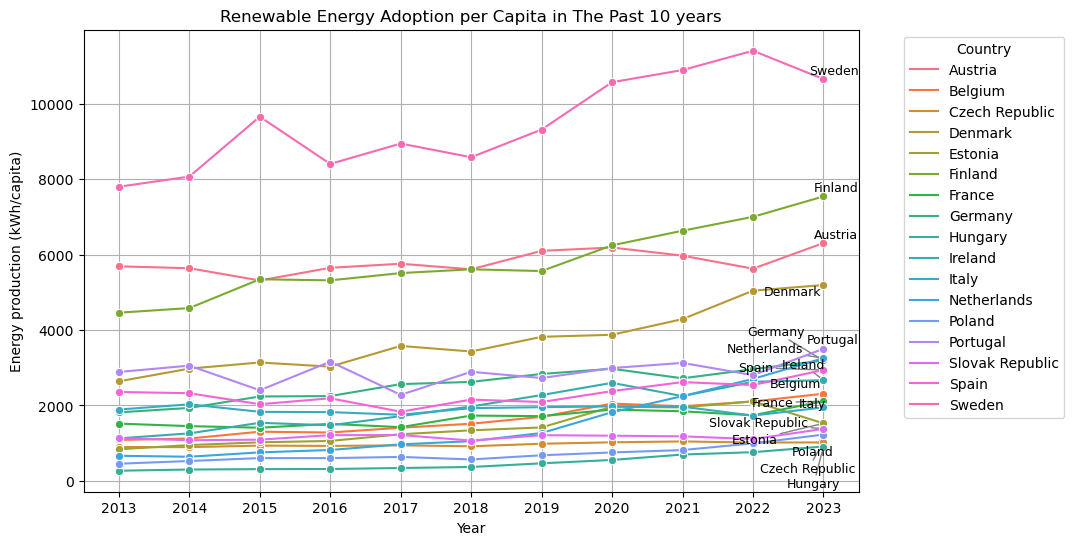

In [384]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# visualize Renewable Energy adoption of every country

# initialize the plot
plt.figure(figsize=(10,6))

# plot each country's data
sns.lineplot(data=RE_production_df, x=RE_production_df["year"], y=RE_production_df["value_(kWh/capita)"], hue=RE_production_df["country_name"], marker='o')

plt.title('Renewable Energy Adoption per Capita in The Past 10 years')
plt.xlabel('Year')
plt.ylabel('Energy production (kWh/capita)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Set x-axis ticks to show every year
plt.xticks(ticks=range(RE_production_df['year'].min(), RE_production_df['year'].max() + 1))

# Adjusting text annotations
texts = []
for country in RE_production_df['country_name'].unique():
    # Select the last year data point for each country to place the annotation
    subset = RE_production_df[RE_production_df['country_name'] == country]
    x = subset['year'].max()
    y = subset[subset['year'] == x]['value_(kWh/capita)'].values[0]
    texts.append(plt.text(x, y, country, fontsize=9, ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Taking 5 top countries for RE adoption plot

In [385]:
top_6_countries = ["Sweden", "Finland", "Austria", "Denmark", "Portugal", "Germany"]
RE_production_df_top_6 = RE_production_df[RE_production_df["country_name"].isin(top_6_countries)].reset_index(drop=True)

c:\Users\erlin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\erlin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



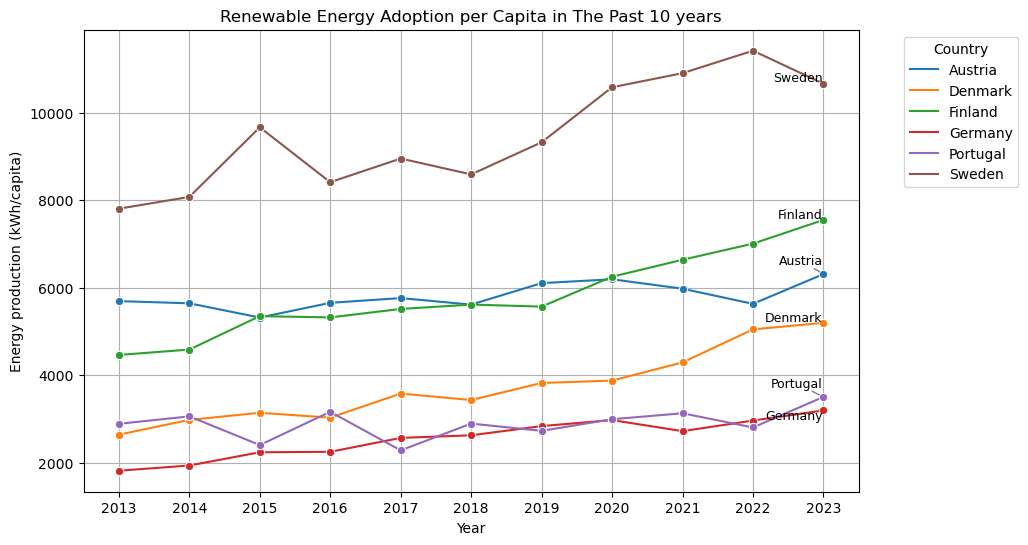

In [386]:
# visualize Renewable Energy adoption of every country

# initialize the plot
plt.figure(figsize=(10,6))

# plot each country's data
sns.lineplot(data=RE_production_df_top_6, x=RE_production_df_top_6["year"], y=RE_production_df_top_6["value_(kWh/capita)"], hue=RE_production_df_top_6["country_name"], marker='o')

plt.title('Renewable Energy Adoption per Capita in The Past 10 years')
plt.xlabel('Year')
plt.ylabel('Energy production (kWh/capita)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Set x-axis ticks to show every year
plt.xticks(ticks=range(RE_production_df_top_6['year'].min(), RE_production_df_top_6['year'].max() + 1))

# Adjusting text annotations
texts = []
for country in RE_production_df_top_6['country_name'].unique():
    # Select the last year data point for each country to place the annotation
    subset = RE_production_df_top_6[RE_production_df_top_6['country_name'] == country]
    x = subset['year'].max()
    y = subset[subset['year'] == x]['value_(kWh/capita)'].values[0]
    texts.append(plt.text(x, y, country, fontsize=9, ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

c:\Users\erlin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\erlin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



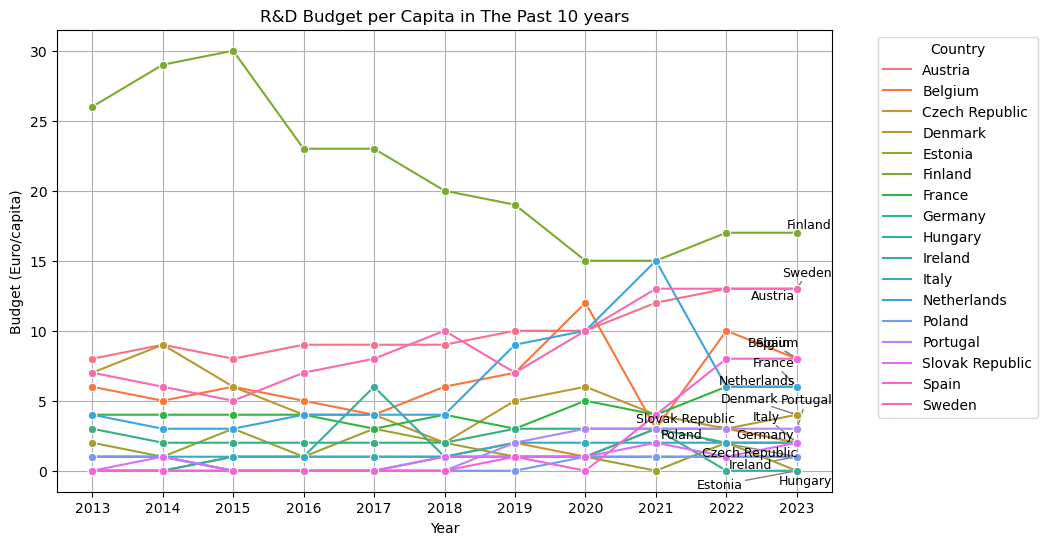

In [387]:
# visualize R&D budget over years by country

# initialize the plot
plt.figure(figsize=(10,6))

# plot each country's data
sns.lineplot(data=df_RnD_budget_long, x=df_RnD_budget_long["year"], y=df_RnD_budget_long["budget_(Euro/capita)"], hue=df_RnD_budget_long["country_name"], marker='o')

plt.title('R&D Budget per Capita in The Past 10 years')
plt.xlabel('Year')
plt.ylabel('Budget (Euro/capita)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Set x-axis ticks to show every year
plt.xticks(ticks=range(df_RnD_budget_long['year'].min(), df_RnD_budget_long['year'].max() + 1))

# Adjusting text annotations
texts = []
for country in df_RnD_budget_long['country_name'].unique():
    # Select the last year data point for each country to place the annotation
    subset = df_RnD_budget_long[df_RnD_budget_long['country_name'] == country]
    x = subset['year'].max()
    y = subset[subset['year'] == x]['budget_(Euro/capita)'].values[0]
    texts.append(plt.text(x, y, country, fontsize=9, ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Taking top 6 countries from R&D budget plot

In [388]:
top_6_countries = ["Sweden", "Finland", "Austria", "Denmark", "Portugal", "Germany"]
df_RnD_budget_long_top_6 = df_RnD_budget_long[df_RnD_budget_long["country_name"].isin(top_6_countries)].reset_index(drop=True)

c:\Users\erlin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\erlin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



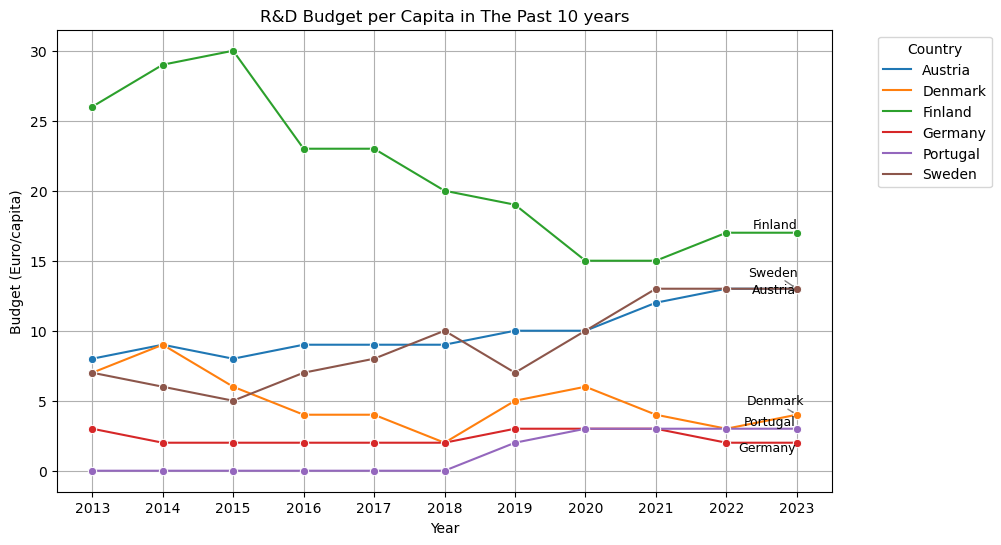

In [389]:
# visualize R&D budget over years by country

# initialize the plot
plt.figure(figsize=(10,6))

# plot each country's data
sns.lineplot(data=df_RnD_budget_long_top_6, x=df_RnD_budget_long_top_6["year"], y=df_RnD_budget_long_top_6["budget_(Euro/capita)"], hue=df_RnD_budget_long_top_6["country_name"], marker='o')

plt.title('R&D Budget per Capita in The Past 10 years')
plt.xlabel('Year')
plt.ylabel('Budget (Euro/capita)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Set x-axis ticks to show every year
plt.xticks(ticks=range(df_RnD_budget_long_top_6['year'].min(), df_RnD_budget_long_top_6['year'].max() + 1))

# Adjusting text annotations
texts = []
for country in df_RnD_budget_long_top_6['country_name'].unique():
    # Select the last year data point for each country to place the annotation
    subset = df_RnD_budget_long_top_6[df_RnD_budget_long_top_6['country_name'] == country]
    x = subset['year'].max()
    y = subset[subset['year'] == x]["budget_(Euro/capita)"].values[0]
    texts.append(plt.text(x, y, country, fontsize=9, ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Correlation between RE adoption and R&D budget

In [390]:
# First we need to merge both dataframes

merged_df = pd.merge(RE_production_df, df_RnD_budget_long, on=["country_name", "year", "geo", "population"])
merged_df.head()

,country_name,year,value_(GWh),geo,population,value_(kWh/capita),budget_(million_Euro),budget_(Euro/capita)
0,Austria,2013,51827,AT,9104772,5692,73.902,8
1,Austria,2014,51369,AT,9104772,5642,80.348,9
2,Austria,2015,48406,AT,9104772,5317,72.471,8
3,Austria,2016,51467,AT,9104772,5653,82.885,9
4,Austria,2017,52450,AT,9104772,5761,81.356,9


In [391]:
import plotly.express as px

fig = px.scatter(merged_df, x="budget_(Euro/capita)", y="value_(kWh/capita)", color="year", text="country_name",
           trendline="ols", template="simple_white", title='Renewable Energy Production vs R&D Budget per Capita in The Past 10 years')

fig.update_traces(textposition="top center")

fig.update_layout(
    xaxis_title= "R&D Budget (Euro/capita)",
    yaxis_title= "Renewable Energy Production (kWh/capita)",
    legend_title_text= "Year"
)

fig.show()

In [392]:
import plotly.express as px

fig = px.scatter(merged_df, x="budget_(Euro/capita)", y="value_(kWh/capita)", color="year", hover_name="country_name",
           trendline="ols", template="simple_white", title='Renewable Energy Production vs R&D Budget per Capita in The Past 10 years')

fig.update_traces(textposition="top center")

fig.update_layout(
    xaxis_title= "R&D Budget (Euro/capita)",
    yaxis_title= "Renewable Energy Production (kWh/capita)",
    legend_title_text= "Year"
)

fig.show()

In [393]:
# now only focus on the top 6 countries

merged_df_top_6 = pd.merge(RE_production_df_top_6, df_RnD_budget_long_top_6, on=["country_name", "year", "geo", "population"])
merged_df_top_6.head()

,country_name,year,value_(GWh),geo,population,value_(kWh/capita),budget_(million_Euro),budget_(Euro/capita)
0,Austria,2013,51827,AT,9104772,5692,73.902,8
1,Austria,2014,51369,AT,9104772,5642,80.348,9
2,Austria,2015,48406,AT,9104772,5317,72.471,8
3,Austria,2016,51467,AT,9104772,5653,82.885,9
4,Austria,2017,52450,AT,9104772,5761,81.356,9


In [394]:
top_6_countries = ["Sweden", "Finland", "Austria", "Denmark", "Portugal", "Germany"]
RE_production_df_top_6 = RE_production_df[RE_production_df["country_name"].isin(top_6_countries)].reset_index(drop=True)
RE_production_df_top_6

,country_name,year,value_(GWh),geo,population,value_(kWh/capita)
0,Austria,2013,51827,AT,9104772,5692
1,Austria,2014,51369,AT,9104772,5642
2,Austria,2015,48406,AT,9104772,5317
3,Austria,2016,51467,AT,9104772,5653
4,Austria,2017,52450,AT,9104772,5761
...,...,...,...,...,...,...
61,Sweden,2019,98073,SE,10521556,9321
62,Sweden,2020,111297,SE,10521556,10578
63,Sweden,2021,114682,SE,10521556,10900
64,Sweden,2022,120078,SE,10521556,11413


In [395]:
top_6_countries = ["Sweden", "Finland", "Austria", "Denmark", "Portugal", "Germany"]
df_RnD_budget_long_top_6 = df_RnD_budget_long[df_RnD_budget_long["country_name"].isin(top_6_countries)].reset_index(drop=True)
df_RnD_budget_long_top_6

,country_name,year,budget_(million_Euro),geo,population,budget_(Euro/capita)
0,Austria,2013,73.902,AT,9104772,8
1,Denmark,2013,40.110,DK,5932654,7
2,Finland,2013,144.673,FI,5563970,26
3,Germany,2013,239.019,DE,84358845,3
4,Portugal,2013,2.720,PT,10467366,0
...,...,...,...,...,...,...
61,Denmark,2023,22.959,DK,5932654,4
62,Finland,2023,94.635,FI,5563970,17
63,Germany,2023,195.012,DE,84358845,2
64,Portugal,2023,32.196,PT,10467366,3


In [396]:
import plotly.express as px

fig = px.scatter(merged_df_top_6, x="budget_(Euro/capita)", y="value_(kWh/capita)", color="year", text="country_name",
           trendline="ols", template="simple_white", title='Renewable Energy Production vs R&D Budget per Capita in The Past 10 years')

fig.update_traces(textposition="top center")

fig.update_layout(
    xaxis_title= "R&D Budget (Euro/capita)",
    yaxis_title= "Renewable Energy Production (kWh/capita)",
    legend_title_text= "Year"
)

fig.show()

In [397]:
from scipy.stats import pearsonr

r, _ = pearsonr(merged_df['budget_(Euro/capita)'], merged_df['value_(kWh/capita)'])

# Create scatter plot with trendline
fig = px.scatter(
    merged_df, 
    x="budget_(Euro/capita)", 
    y="value_(kWh/capita)", 
    color="year", 
    hover_name="country_name",
    trendline="ols", 
    template="simple_white", 
    title='RE Production vs R&D Budget per Capita in The Past 10 years'
)

# Extract the trendline results
trendline = fig.data[1]  # The trendline is the second trace (index 1)

# Add annotation for the correlation coefficient
fig.add_annotation(
    x=0.05, 
    y=0.95, 
    xref="paper", 
    yref="paper",
    text=f'r = {r:.2f}',
    showarrow=False,
    font=dict(size=12, color='red')
)

fig.update_layout(
    xaxis_title="R&D Budget (Euro/capita)",
    yaxis_title="Renewable Energy Production (kWh/capita)",
    legend_title_text="Year"
)

fig.show()

In [398]:
from scipy.stats import pearsonr

r, _ = pearsonr(merged_df_top_6['budget_(Euro/capita)'], merged_df_top_6['value_(kWh/capita)'])

# Create scatter plot with trendline
fig = px.scatter(
    merged_df_top_6, 
    x="budget_(Euro/capita)", 
    y="value_(kWh/capita)", 
    color="year", 
    hover_name="country_name",
    trendline="ols", 
    template="simple_white", 
    title='RE Production vs R&D Budget per Capita in The Past 10 years'
)

# Extract the trendline results
trendline = fig.data[1]  # The trendline is the second trace (index 1)

# Add annotation for the correlation coefficient
fig.add_annotation(
    x=0.05, 
    y=0.95, 
    xref="paper", 
    yref="paper",
    text=f'r = {r:.2f}',
    showarrow=False,
    font=dict(size=12, color='red')
)

fig.update_layout(
    xaxis_title="R&D Budget (Euro/capita)",
    yaxis_title="Renewable Energy Production (kWh/capita)",
    legend_title_text="Year"
)

fig.show()

In [ ]:
df_RE_production = clean_RE_production(df_main)

In [ ]:
data_url = 'url'
df_RnD_budget = clean_RnD_budget(data_url)

In [ ]:
data_url = 'url'
df_population = clean_population(data_url)

In [ ]:
df_RE_production_per_capita = RE_production_per_capita(df_RE_production, df_population)

In [ ]:
df_RnD_budget_per_capita = RnD_budget_per_capita(df_RnD_budget, df_population)

In [ ]:
visualize_hypothesis_3(df_RE_production_per_capita, df_RnD_budget_per_capita)